# This is the instructions for HW 3.

# In this homework, you have Two programming Questions

# The submission deadline is Feb 24th (next Friday) 23:59PM. Please submit the ipynb file to the canvas

# NO Late submission

The demos we used in the class can be found using the following link:

https://colab.research.google.com/drive/1ONTJ_L_4CMcyJcXdCeljRntazdW1zjW6?usp=sharing

https://colab.research.google.com/drive/1QI4v4_1bdeN5dJ_McV1Xn-RiavYvgymn?usp=sharing

# ===============================================

# Question 1: KNN in image classification

## Step1: Get to know the dataset [MNIST dataset](https://www.tensorflow.org/datasets/catalog/mnist) (Please click and read it before you run the following code)

The following code downloads the MNIST dataset from the official website. Run this just once to get the "mnist.pkl" file. 

After you run this code, you can find the file in the "Files" option from the tool bar on the left 

<-

In [2]:
import numpy as np
from urllib import request
import gzip
import pickle

filename = [
["training_images","train-images-idx3-ubyte.gz"],
["test_images","t10k-images-idx3-ubyte.gz"],
["training_labels","train-labels-idx1-ubyte.gz"],
["test_labels","t10k-labels-idx1-ubyte.gz"]
]

def download_mnist():
    base_url = "http://yann.lecun.com/exdb/mnist/"
    for name in filename:
        print("Downloading "+name[1]+"...")
        request.urlretrieve(base_url+name[1], name[1])
    print("Download complete.")

def save_mnist():
    mnist = {}
    for name in filename[:2]:
        with gzip.open(name[1], 'rb') as f:
            mnist[name[0]] = np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1,28*28)
    for name in filename[-2:]:
        with gzip.open(name[1], 'rb') as f:
            mnist[name[0]] = np.frombuffer(f.read(), np.uint8, offset=8)
    with open("mnist.pkl", 'wb') as f:
        pickle.dump(mnist,f)
    print("Save complete.")

def init():
    download_mnist()
    save_mnist()
#    print ((load()[0]).shape)
def load():
    with open("mnist.pkl",'rb') as f:
        mnist = pickle.load(f)
    return mnist["training_images"], mnist["training_labels"], mnist["test_images"], mnist["test_labels"]

if __name__ == '__main__':
    init()

Download complete.
Save complete.


## If you are interested in what the data looks like. You can run the following code to see.

60000 60000 10000 10000
784 60000 784 10000
===========this is the original image===========
6


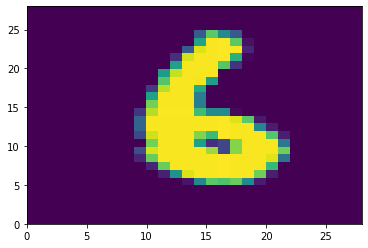

===========this is the vectorized image===========


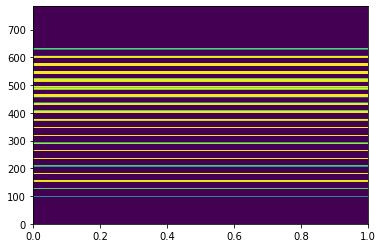

In [47]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm


import numpy as np
from urllib import request
import gzip
import math
import pickle




def loadB():
    with open("mnist.pkl",'rb') as f:
        mnist = pickle.load(f)

        training_images, training_labels, testing_images, testing_labels = mnist["training_images"], mnist["training_labels"], mnist["test_images"], mnist["test_labels"]
        # Normalize the images
        training_images.astype('float32')
        testing_images.astype('float32')
        training_images = training_images / 255
        testing_images = testing_images / 255
        return training_images, training_labels, testing_images, testing_labels


TRimg,TRlab,TSimg,TSlab=loadB()
print(len(TRimg),len(TRlab),len(TSimg),len(TSlab))
print(len(TRimg[0]),len(TRlab),len(TSimg[0]),len(TSlab))

showInd=66
Column=np.reshape(TRimg[showInd], (784, 1))
arr_2d = np.reshape(TRimg[showInd], (28, 28))
arr_2dT=np.rot90(arr_2d)
arr_2dTA=np.rot90(arr_2dT)
Final=np.fliplr(arr_2dTA)
#arr_2dTA=np.transpose(arr_2dT)
#arr_2dTB=np.transpose(arr_2dTA)
print("===========this is the original image===========")
plt.pcolor(Final)
print(TRlab[showInd])
plt.show()
print("===========this is the vectorized image===========")
plt.pcolor(Column)
plt.show()

#pcm = plt.pcolormesh(arr_2d,cmap='RdBu_r')
#plt.colorbar(pcm)
#plt.show()

## In the next part, please implement the KNN function for hand written digit recognition



## What is the format of the dataset:

**x_train** : 60,000x784 numpy array that each row contains flattened version of training images. 

**y_train** : 1x60,000 numpy array that each component is true label of the  corresponding training images. 

**x_test** : 10,000x784 numpy array that each row contains flattened version of
test images. Each vector of 784 is the vector for one image.

**y_test** : 1x10,000 numpy array that each component is true label of the 
corresponding test images. 

**Notice**:  Once  you  get  “mnist.pkl”,  you  don't  need  to  call  init()  anymore. 
Everything you need to do is to locate “mnist.pkl” 
in your working directory and  to call load(). Then you can load  the MNIST 
database in your code (given below) 

**Notice**: Due to the high computational complexity of KNN, you do not need 
to  classify  all  10000  test  images.  Instead,  you  can  select  how  many  test 
images to classify in 

"outputlabels=kNNClassify(x_test[0:20],x_train,y_train,10)"

The suggested configuration is 20 test images and K=10

**Note**: The code for data loading has been given. You can 
utilize them or write your own codes. Basically, you just need to modify the code bellow. You can choose the value of k (suggested value is 10). Also, 
choose L2 distance as the measurement metric. 

Accuracy result and execution time should be printed out and you can directly use the code provided in the following

## Step 2 implement your KNN algorithm

Now you need to implement the KNN algorithm below. Test the KNN algorithm for 20 test images. Calculate the processing overhead (time consumption) and the classification accuracy (code provided, the accuracy should be higher than 30%). 

In [36]:
import math
import numpy as np  
import operator  
import time
import pickle

#load the data that you downloaded

def load():
    with open("mnist.pkl",'rb') as f:
        mnist = pickle.load(f)
    return mnist["training_images"], mnist["training_labels"], mnist["test_images"], mnist["test_labels"]

# classify using kNN  
#x_train = np.load('../x_train.npy')
#y_train = np.load('../y_train.npy')
#x_test = np.load('../x_test.npy')
#y_test = np.load('../y_test.npy')
'''
The meaning of each data
x_train, training data
y_train, corresponding label
x_test,  testing data
y_test. corresponding label
'''
x_train, y_train, x_test, y_test = load()
print(x_train.shape) # should be (60000, 784) meaning 60000 images. each image has been converted into one vector.

def most_frequent(List):
    counter = 0
    num = List[0]
     
    for i in List:
        curr_frequency = List.count(i)
        if(curr_frequency> counter):
            counter = curr_frequency
            num = i
 
    return num

def kNNClassify(newInput, dataSet, labels, k): 
    result=[]
    ########################
    # Add your code here #
    ########################
    
    #step 1: calculate Euclidean distance (L2)
    


    #step 2: sort the distance 



    #step 3: the most common class will be returned 
    distanceTest = []
    Klist = []
    min = []
    
    for TE in range(newInput.shape[0]):
      for TR in range(dataSet.shape[0]):
        distanceTest.append(np.sqrt(np.sum((newInput[TE]-dataSet[TR])**2)))
      #mindistance = np.asarray(distancelist)
      min = np.argpartition(distanceTest,k)
      #print(min)
      for i in range(k):
        Klist.append(labels[min[i]])
        #print(labels[min[i]])
      print(most_frequent(Klist))
      result.append(most_frequent(Klist))
      distanceTest = []
      min = []
      Klist = []
        
    ####################
    # End of your code #
    ####################
    print(result)
    return result


#Calculate the processing overhead (time consumption) and the classification accuracy.
start_time = time.time()
outputlabels=kNNClassify(x_test[0:20],x_train,y_train,10) # your function
result = y_test[0:20] - outputlabels
result = (1 - np.count_nonzero(result)/len(outputlabels))
print ("---classification accuracy for knn on mnist: %s ---" %result)
print ("---execution time: %s seconds ---" % (time.time() - start_time))

(60000, 784)
7
1
1
0
3
1
7
7
1
1
4
4
7
1
1
1
7
1
3
4
[7, 1, 1, 0, 3, 1, 7, 7, 1, 1, 4, 4, 7, 1, 1, 1, 7, 1, 3, 4]
---classification accuracy for knn on mnist: 0.35 ---
---execution time: 13.171547412872314 seconds ---


# Question 2 [K-Means](https://colab.research.google.com/drive/1QI4v4_1bdeN5dJ_McV1Xn-RiavYvgymn?usp=sharing) 

Comparing to the KNN, K-means is an unsupervised learning which does not require the label. In this question, you will directly divide the 10000 test images into 10 groups using K-means. This question has two challenging tasks that you need to solve:



1.   Task 1: Implement the K-Means for image classification in MNIST dataset. (K=10) Check the different results when starting with different the centroids. For example, what would be the difference between selecting 10 centroids from each class and selecting 10 centroids from one class. (You do not need to calculate the accuracy)

2.   Task 2: How to evaluate the performance. You need to carefully design the code to check the classification results, since in un-supervised learning, the clustering result does not include the classification results. For example, by using K-means, you know some data points belong to one cluster but you do not know which class it blongs to. For another example, after you apply the K-Means, you get 1000 images that are clustered into one group. However, some of them have the label of "7" and some of them have the label of "8". You do not know the class for this particular cluster. So, how to decide and how to ecaluate the classifcation accuracy is very challenge (groundtruth could be applied here). Please design an evaluation method to evaluate the clustering performance of using K-means in MNIST dataset.



- Task 1 is required for all students.

- Task 2 is only required for graduate student and is optional for undergraduate student. Any undergraduate student who finishes Task 2 will receive 10% bonus for this homework (not to the final grade) (should not exceed the full score).

In [55]:
import math
import numpy as np  
import operator  
import time
import pickle
import random

#load the data that you downloaded

def load():
    with open("mnist.pkl",'rb') as f:
        mnist = pickle.load(f)
    return mnist["training_images"], mnist["training_labels"], mnist["test_images"], mnist["test_labels"]

# classify using kNN  
#x_train = np.load('../x_train.npy')
#y_train = np.load('../y_train.npy')
#x_test = np.load('../x_test.npy')
#y_test = np.load('../y_test.npy')
'''
x_train, training data
y_train, corresponding label
x_test,  testing data
y_test. corresponding label
'''
x_train, y_train, x_test, y_test = load()
print(x_train.shape)

def KM(X_train, k):
  index = random.sample(list(range(len(X_train))), k)
  print(X_train.shape)
  RepeatKM(X_train, index)

def RepeatKM(X_train, Centroids):
  NewClass=[]
  # Classification for each data point
  # Outer loop go through each data point
  for One in X_train:
    L2_Dis=[]
    for Center in Centroids:
      # for each datapoint, calculate the distance between this datapoint to 
      # each center.
      L2_Dis.append(np.sqrt(np.sum((One-Center)**2)))
    
    NP_D=np.asarray(L2_Dis)
    min_index = np.argmin(NP_D)
    print(L2_Dis,min_index)
    # find the new class for each datapoint based on the centroid of each class
    NewClass.append(min_index)

  Row,Col=Centroids.shape
  #print(Row,Col)
  # update the centroids based on the classification results
  for i in range(Row):
    TmpCent=np.zeros(Col)
    count=0
    for j in range(len(NewClass)):
      if NewClass[j]==i:
        #print(NewClass[j],i)
        for k in range(Col):
          TmpCent[k]=TmpCent[k]+X_train[j][k]
        count=count+1
    #print(TmpCent,"====",count)
    for k in range(Col):
      Centroids[i][k]=float(TmpCent[k]/count)
    print(Centroids[i])
  return Centroids

X_train=np.array([[0,1,0],[0,1,1],[1,2,1],[1,2,0],[1,2,2],[2,2,2],[1,2, -1],[2,2,3],[-1, -1, -1],[0, -1, -2],[0, -1,1],[-1, -2,1]])
Centroids=np.array([[0.0,1.0,0.0],[0,1.0,1.0],[1.0,2.0,1.0]])
x,y=Centroids.shape
print(x,y)
# one iteratin of KMeans
Centroids=RepeatKM(X_train,Centroids)
#print(np.zeros(2))
print(Centroids)
#print(KM(x_train, 10))


(60000, 784)
3 3
[0.0, 1.0, 1.7320508075688772] 0
[1.0, 0.0, 1.4142135623730951] 1
[1.7320508075688772, 1.4142135623730951, 0.0] 2
[1.4142135623730951, 1.7320508075688772, 1.0] 2
[2.449489742783178, 1.7320508075688772, 1.0] 2
[3.0, 2.449489742783178, 1.4142135623730951] 2
[1.7320508075688772, 2.449489742783178, 2.0] 0
[3.7416573867739413, 3.0, 2.23606797749979] 2
[2.449489742783178, 3.0, 4.123105625617661] 0
[2.8284271247461903, 3.605551275463989, 4.358898943540674] 0
[2.23606797749979, 2.0, 3.1622776601683795] 1
[3.3166247903554, 3.1622776601683795, 4.47213595499958] 1
[ 0.    0.25 -1.  ]
[-0.33333333 -0.66666667  1.        ]
[1.4 2.  1.6]
[[ 0.          0.25       -1.        ]
 [-0.33333333 -0.66666667  1.        ]
 [ 1.4         2.          1.6       ]]
